In [1]:
# 머신러닝 언어감지 함수

import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

# folder name을 전달
def get_data_label(folder_name):
    
    files = glob.glob("./머신러닝/language/{}/*.txt".format(folder_name))  # 폴더 내 텍스트 파일 추출
    data = []
    label = []

    for fname in files:
        # 레이블 구하기
        basename = os.path.basename(fname)
        lang = basename.split("-")[0]  # 레이블 추출 : 각 파일의 이름 추출

        # 텍스트 추출하기
        with open(fname, "r", encoding="utf-8") as f:
            text = f.read()  # 파일 내용 읽어오기
            text = text.lower()  # 소문자 변환

        # 알파벳 출현 빈도 구하기
        code_a = ord("a")
        code_z = ord("z")
        cnt = [0 for n in range(0, 26)]  # 26개의 0 - 알파벳의 개수 기본값을 0으로 설정하고, 발생 빈도에 따라 +1 (알파벳 순서)
        for char in text: 
            code_current = ord(char)
            if code_a <= code_current <= code_z:
                cnt[code_current - code_a] += 1  
        print(cnt)

        
        # 리스트에 넣기
        label.append(lang)
        data.append(cnt)
    return data, label


def show_me_the_graph(data, label):
    def Normalize(i):
        return i/total
    # 그래프 준비하기
    graph_dict = {}
    for i in range(0, len(data)):
        y = label[i]
        total = sum(data[i])
        x = list(map(Normalize, data[i]))
        if not (y in graph_dict):
            graph_dict[y] = x

    asclist = [[chr(n) for n in range(97, 97 + 26)]]
    df = pd.DataFrame(graph_dict, index=asclist)
    # 바그래프
    df.plot(kind='bar', subplots=True, ylim=(0, 0.15))
    plt.show()

ord("a"): 문자의 고유한 코드 번호를 알 수 있음

In [2]:
ord("a")

97

In [3]:
ord("z")

122

In [4]:
ord(".")   

# 알파벳보다 작은 숫자를 가지기 때문에 알파벳인 a~z의 고유 코드번호인 97~122 사이의 숫자를 지정하면 '.'과 같은 특수 기호를 제외할 수 있음

46

레이블은 파일명(어느나라 언어인지)

feature는?

[349, 59, 210, 212, 484, 72, 88, 201, 340, 8, 25, 247, 121, 356, 412, 76, 0, 357, 282, 370, 119, 45, 65, 3, 92, 2]
[706, 167, 255, 326, 1149, 146, 262, 230, 632, 22, 82, 355, 203, 449, 577, 170, 46, 756, 601, 652, 257, 115, 117, 17, 90, 5]
[259, 44, 165, 118, 434, 53, 91, 85, 342, 9, 6, 206, 81, 273, 277, 75, 6, 195, 318, 293, 105, 68, 43, 2, 65, 2]
[383, 147, 159, 210, 642, 89, 125, 313, 346, 8, 69, 238, 114, 311, 465, 89, 2, 314, 389, 497, 129, 27, 104, 32, 93, 9]
[337, 93, 142, 181, 645, 93, 93, 260, 297, 15, 27, 181, 132, 284, 302, 86, 2, 331, 272, 436, 114, 49, 109, 14, 68, 3]
[1228, 163, 581, 831, 2347, 253, 167, 242, 1082, 36, 64, 1096, 418, 1126, 767, 406, 92, 1171, 1117, 1210, 834, 223, 11, 61, 57, 13]
[2162, 414, 992, 1244, 4155, 327, 319, 350, 1998, 59, 54, 1804, 873, 1908, 1580, 809, 190, 2074, 2278, 1958, 1511, 295, 126, 108, 148, 13]
[1230, 221, 599, 761, 2550, 178, 179, 195, 1208, 51, 17, 1008, 711, 1290, 1048, 532, 112, 1301, 1325, 1111, 861, 215, 44, 84, 82, 2]
[585, 1

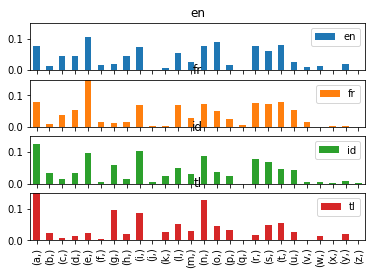

In [5]:
train_data, train_label = get_data_label("train")
test_data, test_label = get_data_label("test")

# 언어 별 알파벳 출현 빈도수 
show_me_the_graph(train_data,train_label)
# 알파벳 출현 빈도수를 feature로 설정

In [6]:
# 분류
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [7]:
model = SVC()
model.fit(train_data, train_label)
result = model.predict(test_data)
score = accuracy_score(result, test_label)
print(score)   #??? 50%....

0.5


정확도가 적게 나온 이유

지도학습을 할 때 빈도수의 숫자 간의 편차가 커지면 숫자가 큰 문자를 중요하다고 생각함

-> 숫자의 범위를 줄여주어 편차를 줄여야함

-> 정규화 과정이 필요

각 빈도수를 빈도수의 총합으로 나눠 

In [8]:
# 정규화

import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

# folder name을 전달
def get_data_label(folder_name):
    def Nomalize(i):
        return i/total
    
    files = glob.glob("./머신러닝/language/{}/*.txt".format(folder_name))  # 폴더 내 텍스트 파일 추출
    data = []
    label = []

    for fname in files:
        # 레이블 구하기
        basename = os.path.basename(fname)
        lang = basename.split("-")[0]  # 레이블 추출 : 각 파일의 이름 추출

        # 텍스트 추출하기
        with open(fname, "r", encoding="utf-8") as f:
            text = f.read()  # 파일 내용 읽어오기
            text = text.lower()  # 소문자 변환

        # 알파벳 출현 빈도 구하기
        code_a = ord("a")
        code_z = ord("z")
        cnt = [0 for n in range(0, 26)]  # 26개의 0 - 알파벳의 개수 기본값을 0으로 설정하고, 발생 빈도에 따라 +1 (알파벳 순서)
        for char in text: 
            code_current = ord(char)
            if code_a <= code_current <= code_z:
                cnt[code_current - code_a] += 1  
        #print(cnt)
        total = sum(cnt)
        cnt_norm = list(map(Nomalize, cnt))   ## map(함수, 리스트) : 함수에 리스트 적용 - map 함수의 반환값이 리스트가 아니므로 list()사용

        
        # 리스트에 넣기
        label.append(lang)
        data.append(cnt_norm)   # 정규화 한 값으로 추가 (변경)
    return data, label


def show_me_the_graph(data, label):
    def Normalize(i):
        return i/total
    # 그래프 준비하기
    graph_dict = {}
    for i in range(0, len(data)):
        y = label[i]
        total = sum(data[i])
        x = list(map(Normalize, data[i]))
        if not (y in graph_dict):
            graph_dict[y] = x

    asclist = [[chr(n) for n in range(97, 97 + 26)]]
    df = pd.DataFrame(graph_dict, index=asclist)
    # 바그래프
    df.plot(kind='bar', subplots=True, ylim=(0, 0.15))
    plt.show()

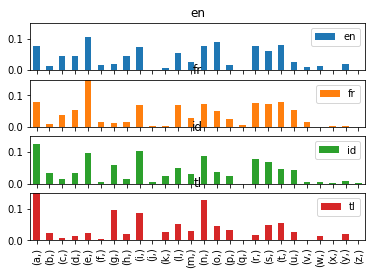

1.0


In [9]:
train_data, train_label = get_data_label("train")
test_data, test_label = get_data_label("test")

# 언어 별 알파벳 출현 빈도수 
show_me_the_graph(train_data,train_label)
# 알파벳 출현 빈도수를 feature로 설정

model = SVC()
model.fit(train_data, train_label)
result = model.predict(test_data)
score = accuracy_score(result, test_label)
print(score)   # 정확도 1 - 완벽한 성능을 보임 -> 알파벳이 언어감지에 적합한 feature 라는 것을 알 수 있음

높은 성능을 보이는 것을 확인했으므로 모델을 사용해보자.

In [10]:
def Nomalize(i):
    return i/total

# test_string에 문자열을 대입하여 모델의 성능을 검증해보자.
test_string = "Level Mountain is a large volcanic complex in the Northern Interior of British Columbia, Canada, with a maximum elevation of 2,164 m (7,100 ft). The lower half of Level Mountain consists of a shield-like edifice while its upper half has a more steep, jagged profile. Its broad summit is dominated by the Level Mountain Range, with prominent peaks cut by deep valleys. "
# 알파벳 출현 빈도 구하기
code_a = ord("a")
code_z = ord("z")
cnt = [0 for n in range(0, 26)]  # 26개의 0 - 알파벳의 개수 기본값을 0으로 설정하고, 발생 빈도에 따라 +1 (알파벳 순서)
for char in test_string:
    code_current = ord(char)
    if code_a <= code_current <= code_z:
        cnt[code_current - code_a] += 1  
    #print(cnt)
total = sum(cnt)
cnt_norm = list(map(Nomalize, cnt))   ## map(함수, 리스트) : 함수에 리스트 적용 - map 함수의 반환값이 리스트가 아니므로 list()사용

answer = model.predict([cnt_norm])
print(answer)

['en']


정답